# 1 Utils

In [53]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline


# 2 Single File Visualization


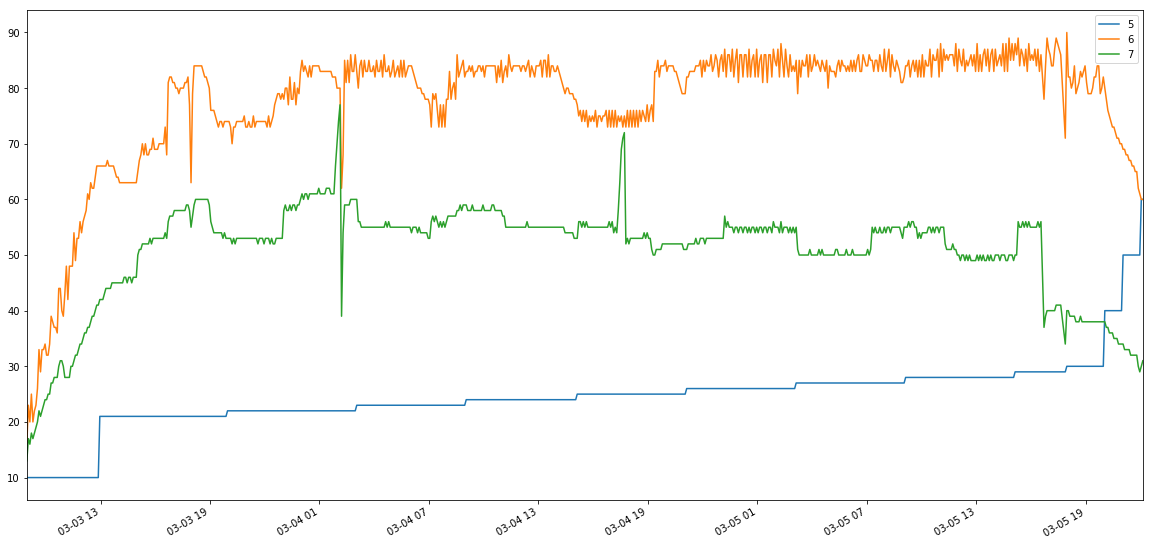

In [4]:
df = pd.read_csv('../Datos/ts_2017/'+'E0103037.txt',sep='\t',header=None)
new_index = pd.to_datetime(df[0]+' '+df[1],dayfirst=True)
f = plt.figure()
df =df.set_index(new_index)
# df[[5,6,7,8,9,49,44,45,63]].plot(kind='line',figsize=(20,10))
df[[5,6,7]].plot(kind='line',figsize=(20,10),label='Inline label')
plt.show()

# 3 Data Preparation
Dont run if caldera_times.csv is already created.

In [62]:
def load_year_files(year):
    file_names = [os.path.basename(x) for x in glob.glob(data_directory+'/Datos/ts_'+year+'/[!~]*.TXT')]
    dir_files = glob.glob(data_directory+'/Datos/ts_' + year  +'/[!~]*.TXT')
    print('Total Archivos',len(file_names))
    print(len(dir_files))
    
    caldera_list = []
    caldera_names = []
    proceso = 0
    for file_name in file_names:
        df = pd.read_csv(data_directory + '/Datos/ts_'+year+'/'+file_name,sep='\t',header=None)
        new_index = new_index = pd.to_datetime(df[0]+' '+df[1],dayfirst=True)
        df = df.set_index(new_index)
        df['nro_camara'] = (file_name[:3])[2]
        df['proceso'] = '{}-{}'.format(year,proceso)
        df = df.drop([0,1],axis=1)
        caldera_list.append(df)
        proceso += 1
    
    caldera = pd.concat(caldera_list)
    print(caldera.shape)
    return caldera

def clean_mydf(df):
    caldera_mean = df.describe()
    caldera_mean = caldera_mean.loc['mean',:]
    caldera_mean_tmp = caldera_mean.reset_index()
    drop_columns= caldera_mean_tmp.loc[caldera_mean_tmp['mean'] == 0].set_index('index').index.values
    df = df.drop(drop_columns,axis=1)
    return df


In [63]:
caldera = load_year_files('2018')

Total Archivos 90
90
(61508, 64)


In [9]:
caldera[caldera.proceso==40].shape

(1016, 64)

In [15]:
caldera.proceso.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89], dtype=int64)

In [16]:
caldera.nro_caldera.unique()

array(['1', '2', '3', '4'], dtype=object)

In [14]:
tmp = clean_mydf(caldera)

# 4 Load, Create and Save Data

## 4.1 Load Data

In [ ]:
c_2018 = load_year_files('2018')
c_2017 = load_year_files('2017')
c_2016 = load_year_files('2016')

In [90]:
chambers = pd.concat([c_2016,c_2017,c_2018])
chambers.head()

,2,3,4,5,6,7,8,9,10,11,...,56,57,58,59,60,61,62,63,nro_caldera,proceso
2016-02-07 17:47:52,,L,0.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2827.0,2816.0,1,2016-0
2016-02-11 20:59:52,<-,L,0.0,10.0,22.0,17.0,73.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0
2016-02-11 21:04:53,<-,L,0.0,10.0,23.0,18.0,73.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0
2016-02-11 21:09:53,<-,L,0.0,10.0,23.0,19.0,76.0,0.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0
2016-02-11 21:14:52,<-,L,0.0,10.0,24.0,20.0,76.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0


## 4.2 Clean Data

In [91]:
chambers = clean_mydf(chambers)
chambers.head()

,2,3,5,6,7,8,9,10,11,12,...,47,48,49,50,60,61,62,63,nro_caldera,proceso
2016-02-07 17:47:52,,L,4.0,4.0,4.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2827.0,2816.0,1,2016-0
2016-02-11 20:59:52,<-,L,10.0,22.0,17.0,73.0,0.0,1.0,0.0,5.0,...,22.0,0.0,73.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0
2016-02-11 21:04:53,<-,L,10.0,23.0,18.0,73.0,0.0,6.0,0.0,5.0,...,23.0,0.0,73.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0
2016-02-11 21:09:53,<-,L,10.0,23.0,19.0,76.0,0.0,11.0,0.0,5.0,...,23.0,0.0,76.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0
2016-02-11 21:14:52,<-,L,10.0,24.0,20.0,76.0,0.0,16.0,0.0,4.0,...,24.0,0.0,76.0,0.0,0.0,5.0,5654.0,1.0,1,2016-0


## 4.3  Data Data by Chamber

In [104]:
c1_2018 = chambers[chambers['nro_caldera']=='1'].loc['2018']
c2_2018 = chambers[chambers['nro_caldera']=='2'].loc['2018']
c2_2018 = chambers[chambers['nro_caldera']=='3'].loc['2018']
c2_2018 = chambers[chambers['nro_caldera']=='4'].loc['2018']
c1_2018.to_csv('..\\Datos\\ts_2018\\c1_2018.csv')
c2_2018.to_csv('..\\Datos\\ts_2018\\c2_2018.csv')
c3_2018.to_csv('..\\Datos\\ts_2018\\c3_2018.csv')
c4_2018.to_csv('..\\Datos\\ts_2018\\c4_2018.csv')

c1_2017 = chambers[chambers['nro_caldera']=='1'].loc['2017']
c2_2017 = chambers[chambers['nro_caldera']=='2'].loc['2017']
c2_2017 = chambers[chambers['nro_caldera']=='3'].loc['2017']
c2_2017 = chambers[chambers['nro_caldera']=='4'].loc['2017']
c1_2017.to_csv('..\\Datos\\ts_2017\\c1_2017.csv')
c2_2017.to_csv('..\\Datos\\ts_2017\\c2_2017.csv')
c3_2017.to_csv('..\\Datos\\ts_2017\\c3_2017.csv')
c4_2017.to_csv('..\\Datos\\ts_2017\\c4_2017.csv')

c1_2016 = chambers[chambers['nro_caldera']=='1'].loc['2016']
c2_2016 = chambers[chambers['nro_caldera']=='2'].loc['2016']
c2_2016 = chambers[chambers['nro_caldera']=='3'].loc['2016']
c2_2016 = chambers[chambers['nro_caldera']=='4'].loc['2016']
c1_2016.to_csv('..\\Datos\\ts_2016\\c1_2016.csv')
c2_2016.to_csv('..\\Datos\\ts_2016\\c2_2016.csv')
c3_2016.to_csv('..\\Datos\\ts_2016\\c3_2016.csv')
c4_2016.to_csv('..\\Datos\\ts_2016\\c4_2016.csv')
print('Done')

Done


# 5 View Chambers

In [20]:
def load_chamber_data(nro_chamber):
    chamber = 'c{}'.format(nro_chamber)
    c_2016 = pd.read_csv('..\\Datos\\ts_2016\\{}_2016.csv'.format(chamber),parse_dates=['Unnamed: 0'],index_col='Unnamed: 0')
    c_2017 = pd.read_csv('..\\Datos\\ts_2017\\{}_2017.csv'.format(chamber),parse_dates=['Unnamed: 0'],index_col='Unnamed: 0')
    c_2018 = pd.read_csv('..\\Datos\\ts_2018\\{}_2018.csv'.format(chamber),parse_dates=['Unnamed: 0'],index_col='Unnamed: 0')
    c = pd.concat([c_2016,c_2017,c_2018])
    c.set_index(pd.to_datetime(c.index),inplace=True)
    return c

In [45]:
#mantenciones

mantenciones = pd.read_csv('..\\Datos\\mantenciones.csv')
mantenciones.drop(['Unnamed: 1'],axis=1,inplace=True)
mantenciones['Hora'] = mantenciones['Hora'].fillna('23:59')
mantenciones.info(9)
mantenciones.head
m1 = mantenciones[mantenciones['Camara']=='1']
m1.index = m1.Fecha
m1.drop(['Fecha'],axis=1,inplace=True)

m2 = mantenciones[mantenciones['Camara']=='2']
m2.index = m2.Fecha
m2.drop(['Fecha'],axis=1,inplace=True)

m3 = mantenciones[mantenciones['Camara']=='3']
m3.index = m3.Fecha
m3.drop(['Fecha'],axis=1,inplace=True)

m4 = mantenciones[mantenciones['Camara']=='4']
m4.index = m4.Fecha
m4.drop(['Fecha'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
Fecha         121 non-null object
Hora          121 non-null object
Camara        117 non-null object
Objeto        121 non-null object
Problema      120 non-null object
Especifico    118 non-null object
Comentario    119 non-null object
dtypes: object(7)
memory usage: 6.7+ KB


C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWa

## 5.1 Chamber 1

In [32]:
c1 = load_chamber_data(1)
print(type(c1['6']))
print(c1['6'].dtypes)

<class 'pandas.core.series.Series'>
float64


2016-02-07 17:47:52  to  2018-03-31 04:52:05


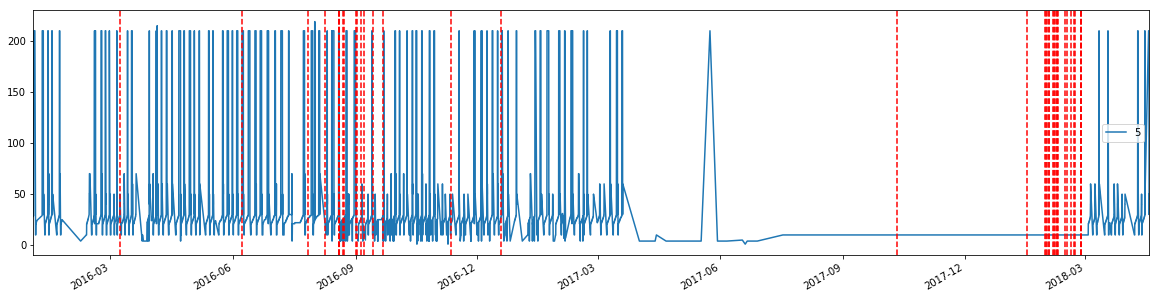

In [43]:
print(c1.index[0],' to ',c1.index[-1])
ax =c1[['5']].plot(figsize=(20,5),sharex=False,sharey=False)

for date in m1.index:
    ax.axvline(date,color='red',linestyle='--')

plt.show()

TypeError: len() of unsized object

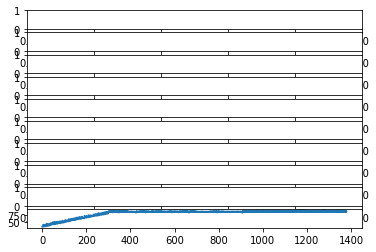

In [103]:
c1_sep = []
# print(len(c1.proceso.unique()))
for p in c1.proceso.unique():
    c1_sep.append(c1['6'][c1['proceso']==p])

fig, ax = plt.subplots(nrows=10, ncols=1)
# fig = plt.figure(figsize=(20,5))
# print(len(c1_sep))
for l in c1_sep[10], row in ax:
#     print(row.i)
    serie = pd.Series(np.array(l))
    plt.plot(serie)
    
    
#     plt.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

# f= plt.figure()
# plt.show()

# fig, ax = plt.subplots(nrows=10, ncols=1)

# for row in ax:
#     print('it',row.rowNum)
#     for col in row:
#         col.plot(x, y)

plt.show()

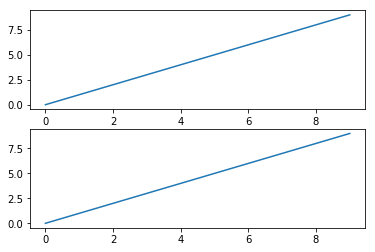

In [96]:
import matplotlib.pyplot as plt

x = range(10)
y = range(10)

fig, ax = plt.subplots(nrows=2, ncols=1)

for row in ax:
    row.plot(x, y)
#     for col in row:

plt.show()

## 5.1 Chamber 2

2016-11-02 14:57:18  to  2018-01-05 14:39:52


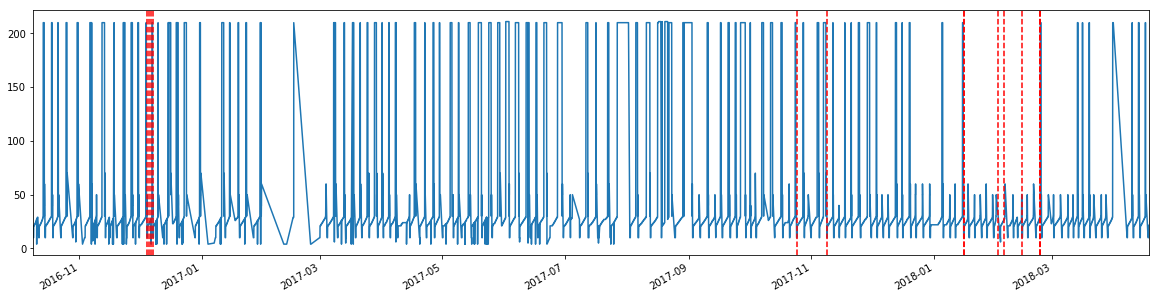

In [47]:
c2 = load_chamber_data(2)
print(c2.index[0],' to ',c2.index[-1])
ax = c2['5'].plot(kind='line',figsize=(20,5),sharex=False,sharey=False)


for date in m2.index:
    ax.axvline(date,color='red',linestyle='--')
plt.show()

## 5.1 Chamber 3

2016-12-02 17:03:29  to  2018-04-08 00:22:49


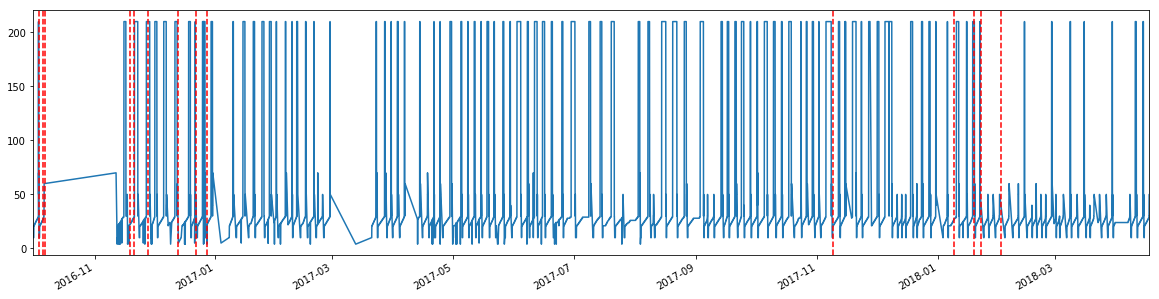

In [48]:
c3 = load_chamber_data(3)
print(c3.index[0],' to ',c3.index[-1])
ax = c3['5'].plot(kind='line',figsize=(20,5),sharex=False,sharey=False)

for date in m3.index:
    ax.axvline(date,color='red',linestyle='--')
    
plt.show()

## 5.1 Chamber 4

2016-11-02 14:57:18  to  2018-01-05 14:39:52


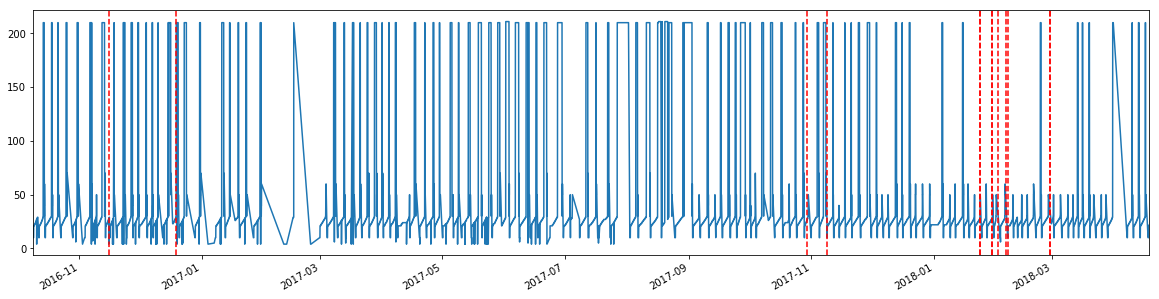

In [49]:
c4 = load_chamber_data(4)
print(c4.index[0],' to ',c4.index[-1])
ax = c4['5'].plot(kind='line',figsize=(20,5),sharex=False,sharey=False)

for date in m4.index:
    ax.axvline(date,color='red',linestyle='--')
    
plt.show()

[]

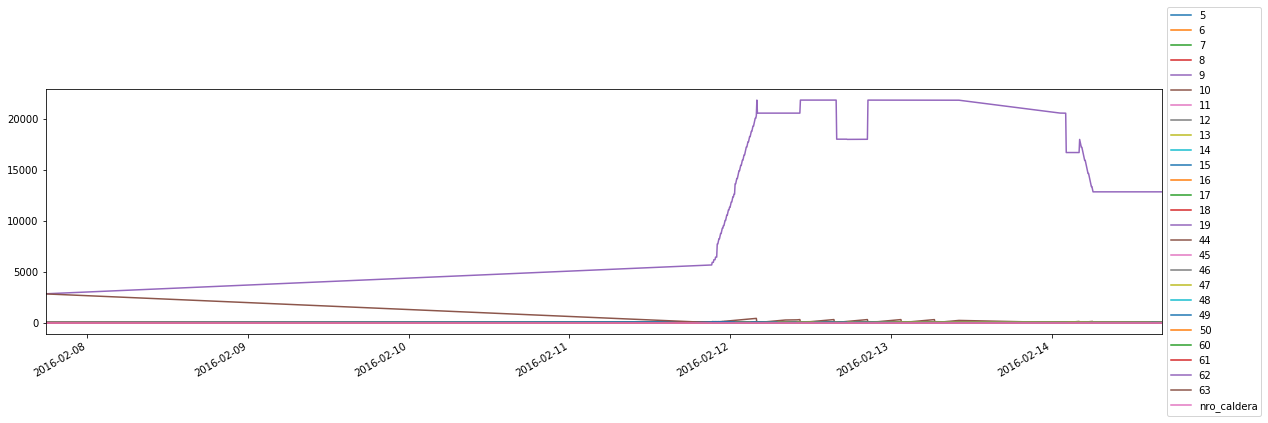

In [193]:
ax = c1.loc[c1['proceso'] == '2016-0'].plot(figsize=(20,5))
ax.legend(bbox_to_anchor=(1,0.5),loc='center left')
plt.plot()

In [197]:
desc = c1.describe()
desc.values.shape
desc.T

,count,mean,std,min,25%,50%,75%,max
5,91553.0,49.674942,63.926561,1.0,22.0,25.0,29.0,219.0
6,91553.0,77.031348,13.342063,0.0,74.0,82.0,85.0,127.0
7,91553.0,52.440368,10.198087,0.0,48.0,53.0,58.0,123.0
8,91553.0,31.785348,15.653118,0.0,21.0,29.0,38.0,127.0
9,91553.0,0.051457,1.647808,0.0,0.0,0.0,0.0,74.0
10,91553.0,222.695597,237.169869,0.0,78.0,174.0,281.0,2246.0
11,91553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
12,91553.0,4.041845,3.380139,0.0,4.0,4.0,4.0,1024.0
13,91553.0,4.041561,3.380065,0.0,4.0,4.0,4.0,1024.0
14,91553.0,4.041146,3.380228,0.0,4.0,4.0,4.0,1024.0


# Caldera Csv

In [ ]:
columns_names=['Date','Hora','Fase','Vent','TBS','TBU','UR','UMd','DF','Pres']

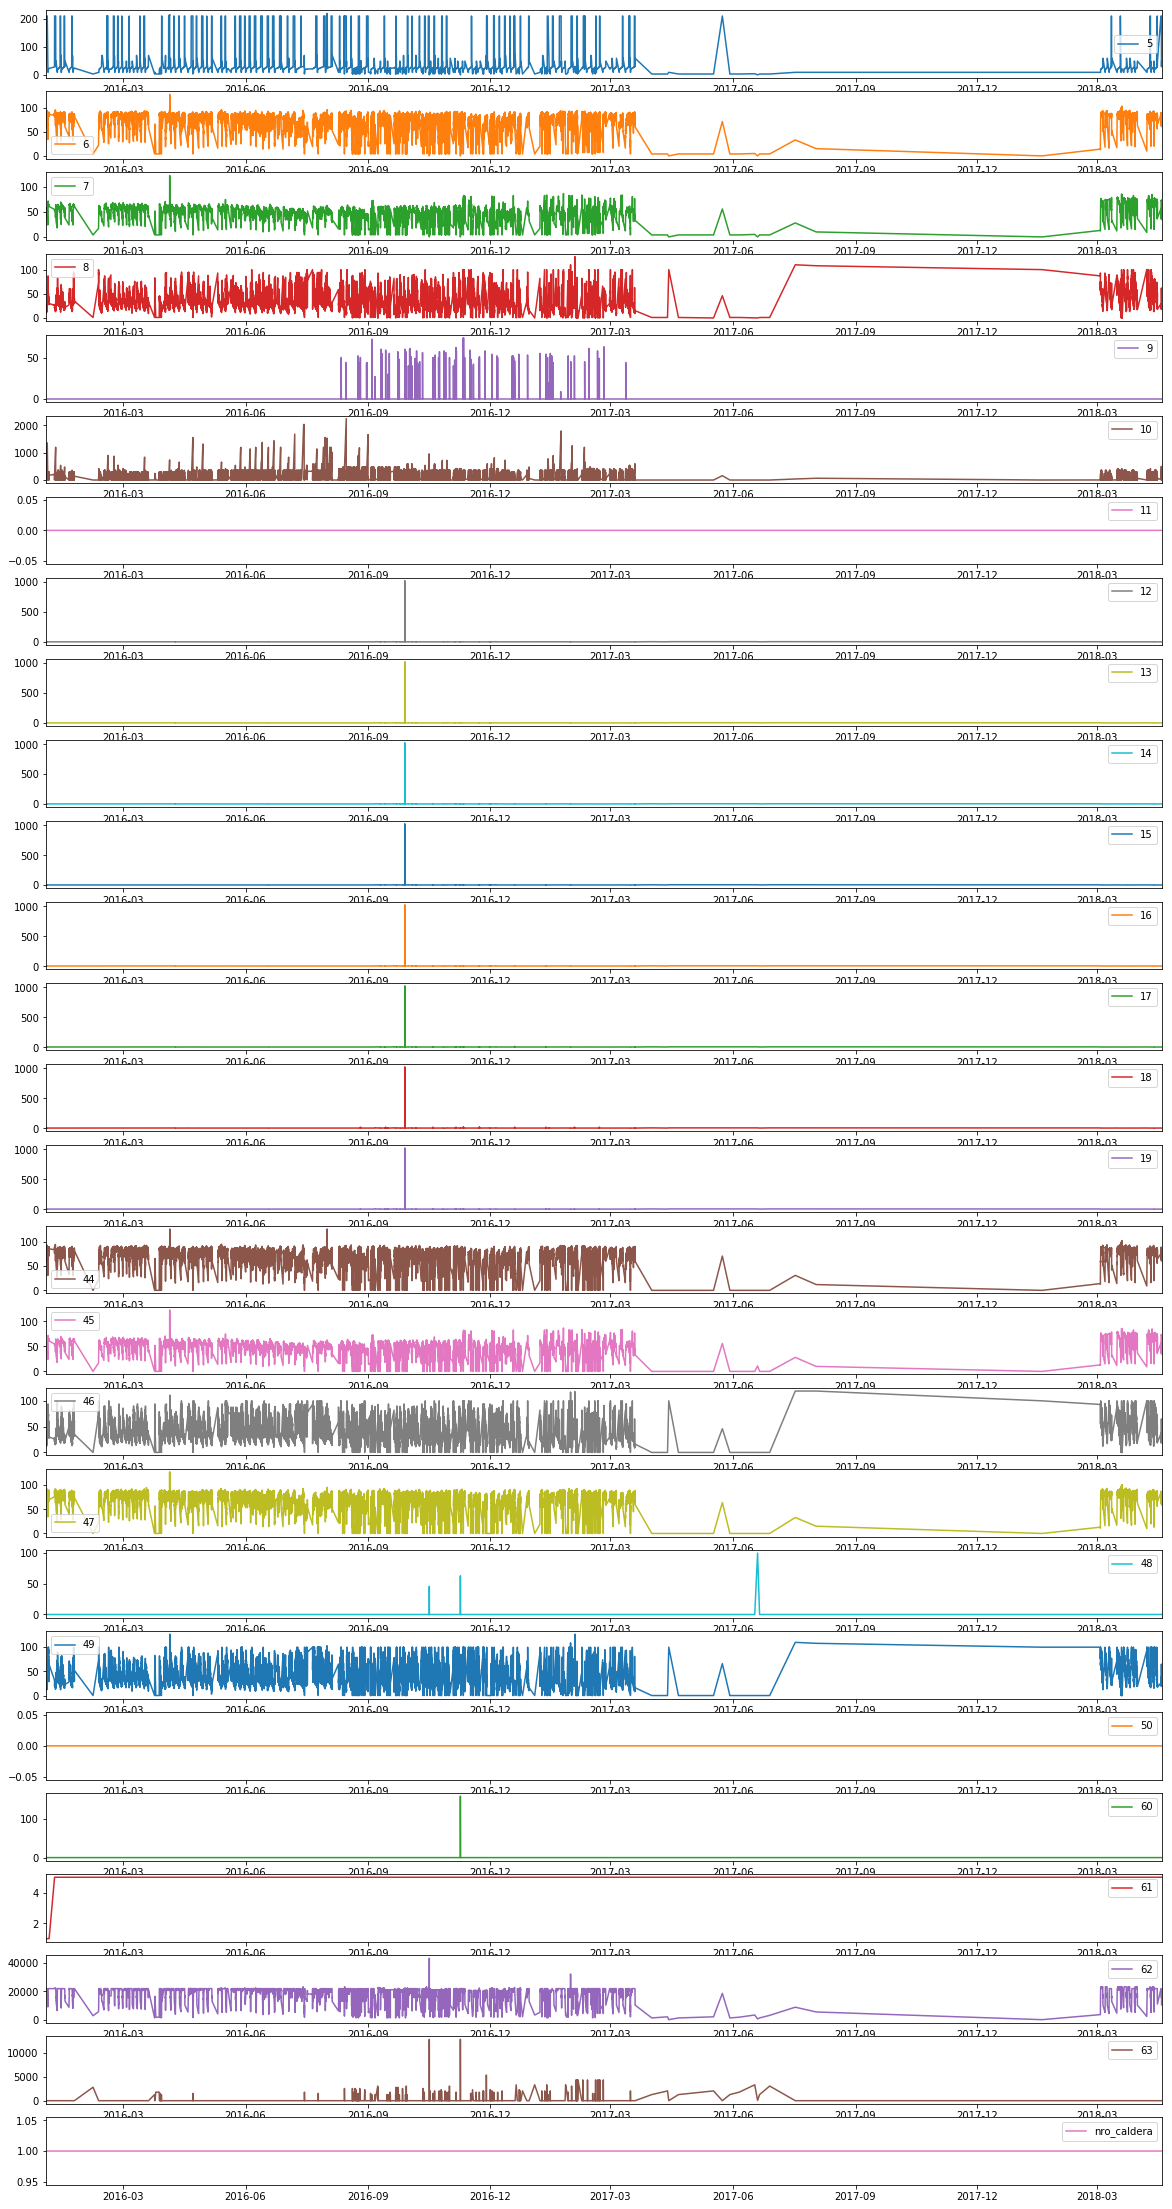

In [194]:
ax = c1.plot(kind='line',figsize=(20,40),subplots=True,sharex=False,sharey=False)
fig=ax[0].get_figure()
plt.show()



In [ ]:
data = data.reset_index()

In [306]:
plt.scatter(data.index.values, data['5'],alpha=0.5)

ValueError: cannot insert level_0, already exists

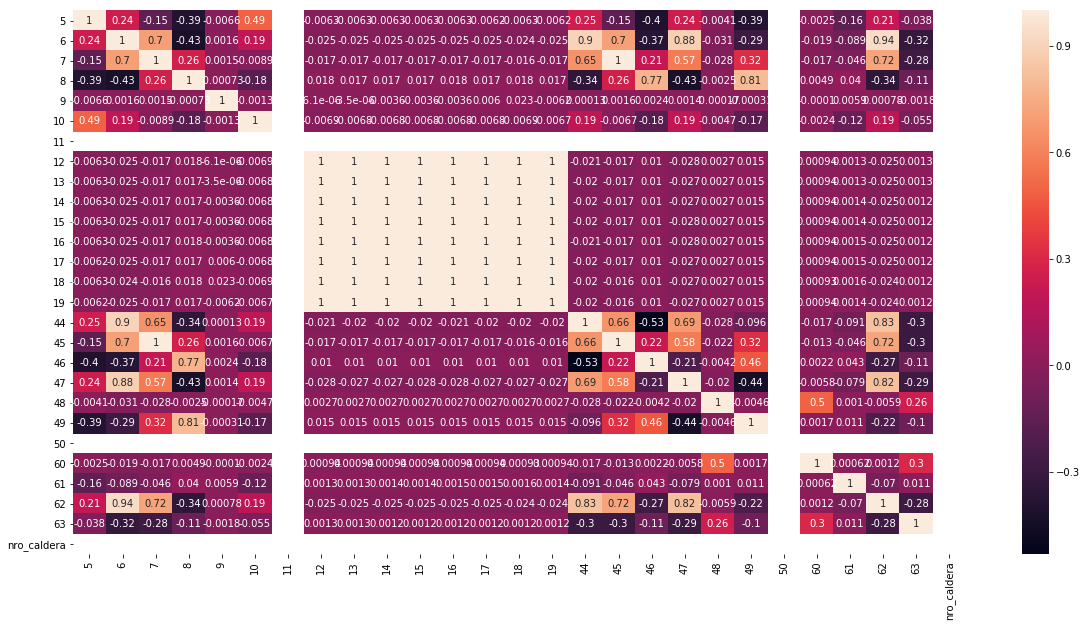

In [195]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
corr_p = c1.corr(method='pearson')
# print(corr_p)

import seaborn as sns
f = plt.figure(figsize=(20,10))
g = sns.heatmap(corr_p, annot=True).get_figure()
g.savefig('time_series_corr.png')

ValueError: The condensed distance matrix must contain only finite values.

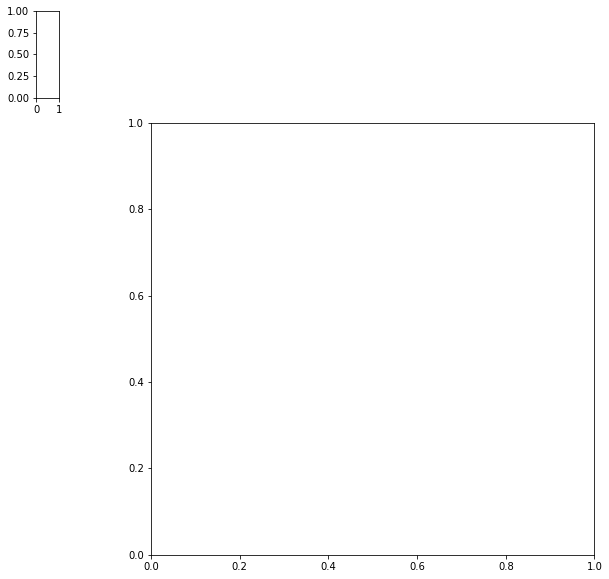

In [196]:
sns.clustermap(corr_p)

In [111]:
# caldera_times['2017'].plot(subplots=True,layout=(13,2),figsize=(20,30),sharex=False,sharey=False)
# plt.show()

In [112]:
# caldera_times['2018'].plot(subplots=True,figsize=(20,30))
# plt.show()

In [128]:
samples = caldera_times.loc['2016-02':'2016-03','5']
print(samples.reset_index().shape)
samples.as_matrix().scatter(samples[0],samples[1],alpha=0.5)
plt.show()

(23541, 2)


AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

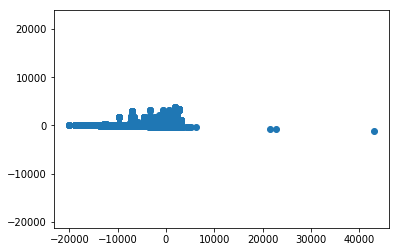

NameError: name 'pearsonr' is not defined

In [65]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

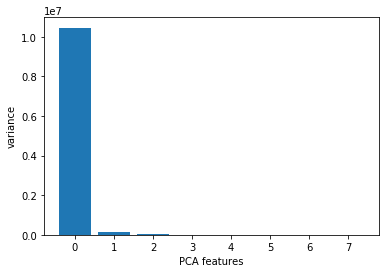

In [54]:
from sklearn.decomposition import PCA
#check variance
pca = PCA(n_components = 8)
pca.fit(samples)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

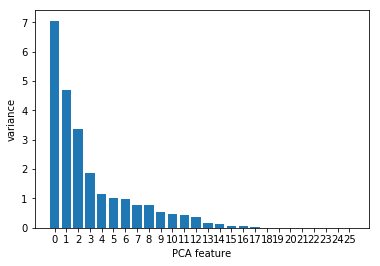

In [53]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


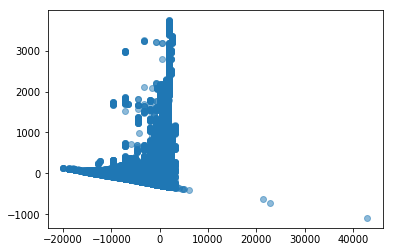

In [57]:
pca = PCA(n_components = 2)
pca.fit(samples)
transformed = pca.transform(samples)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,alpha=0.5)
plt.show()

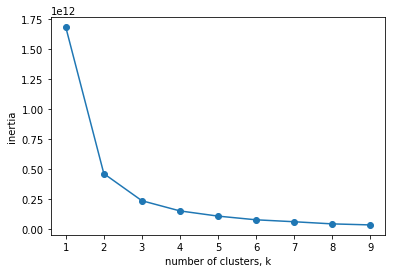

In [48]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(caldera_2016.drop(['2'],axis=1))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


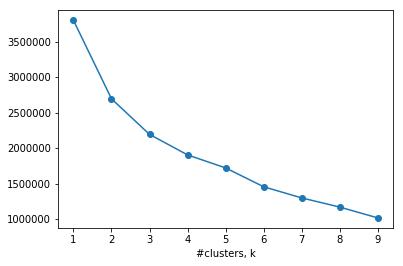

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
scaler = StandardScaler()

for k in ks:
    model = KMeans(n_clusters=k)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(samples)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
 
# for k in ks:
#     model = KMeans(n_clusters=k)
# #     pipeline = make_pipeline(scaler,model)
#     model.fit(personas)
#     inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

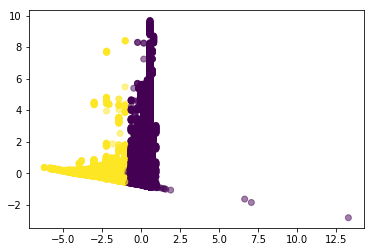

In [63]:
#Clustering

scaler = StandardScaler()

km = KMeans(n_clusters=2, max_iter=300, random_state=None)
km.fit(samples)

# pipeline = make_pipeline(scaler,km)
# pipeline.fit(personas)

# clusters = km.fit_predict(personas)
# personas['cluster'] = pipeline.fit_predict(personas)
clusters = km.fit_predict(samples)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(samples)

xs = pca.fit_transform(samples)[:, 0]
ys = pca.fit_transform(samples)[:, 1]

plt.scatter(xs ,ys, c=clusters,alpha=0.5)
plt.show()